<a href="https://colab.research.google.com/github/Storm00212/QUANT/blob/main/MILLENIUM_ALGO_N%26Q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Google Colab code to simulate a quant finance model with a risk/reward surface and performance charts.
# This is a simplified simulation based on the provided image description.
# Assumptions:
# - The 3D surface represents a risk/reward landscape (e.g., expected return vs. risk vs. time or parameters).
# - The model applies a weighting function during specific trading hours (9:30-12:30 ET).
# - For simplicity, we use synthetic data to mimic S&P 500 returns and an "algo" that outperforms it.
# - The equation is displayed as text in the plot.
# - Run this in Google Colab with %matplotlib inline.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

In [ ]:
# Enable inline plotting
%matplotlib inline

In [ ]:
# Function to generate a synthetic risk/reward surface
def generate_surface():
    x = np.linspace(0, 200, 100)
    y = np.linspace(0, 50, 100)
    X, Y = np.meshgrid(x, y)
    # Synthetic function to mimic the wavy surface in the image (adjust as needed)
    Z = 20 * np.sin(X / 20) * np.cos(Y / 10) + 30 + np.random.normal(0, 5, X.shape)
    return X, Y, Z

# Function to simulate performance data
def simulate_performance(num_days=365):
    np.random.seed(42)  # For reproducibility
    dates = [datetime.date(2025, 1, 1) + datetime.timedelta(days=i) for i in range(num_days)]

    # Synthetic S&P 500 buy-and-hold: moderate returns with volatility
    sp_returns = np.random.normal(0.0005, 0.01, num_days)  # Daily returns ~0.05% mean, 1% std
    sp_cumulative = 15000 * np.cumprod(1 + sp_returns)

    # Synthetic Millennium Algo: higher returns, but only "trades" in morning hours (simulated by boosting returns)
    # Assume the weighting u(t) amplifies returns during "trading window" (simulated as random boost)
    algo_returns = sp_returns + np.random.normal(0.0008, 0.005, num_days)  # Higher mean
    algo_cumulative = 15000 * np.cumprod(1 + algo_returns)

    return dates, sp_cumulative, algo_cumulative


In [ ]:
# Generate data
X, Y, Z = generate_surface()
dates, sp_values, algo_values = simulate_performance()

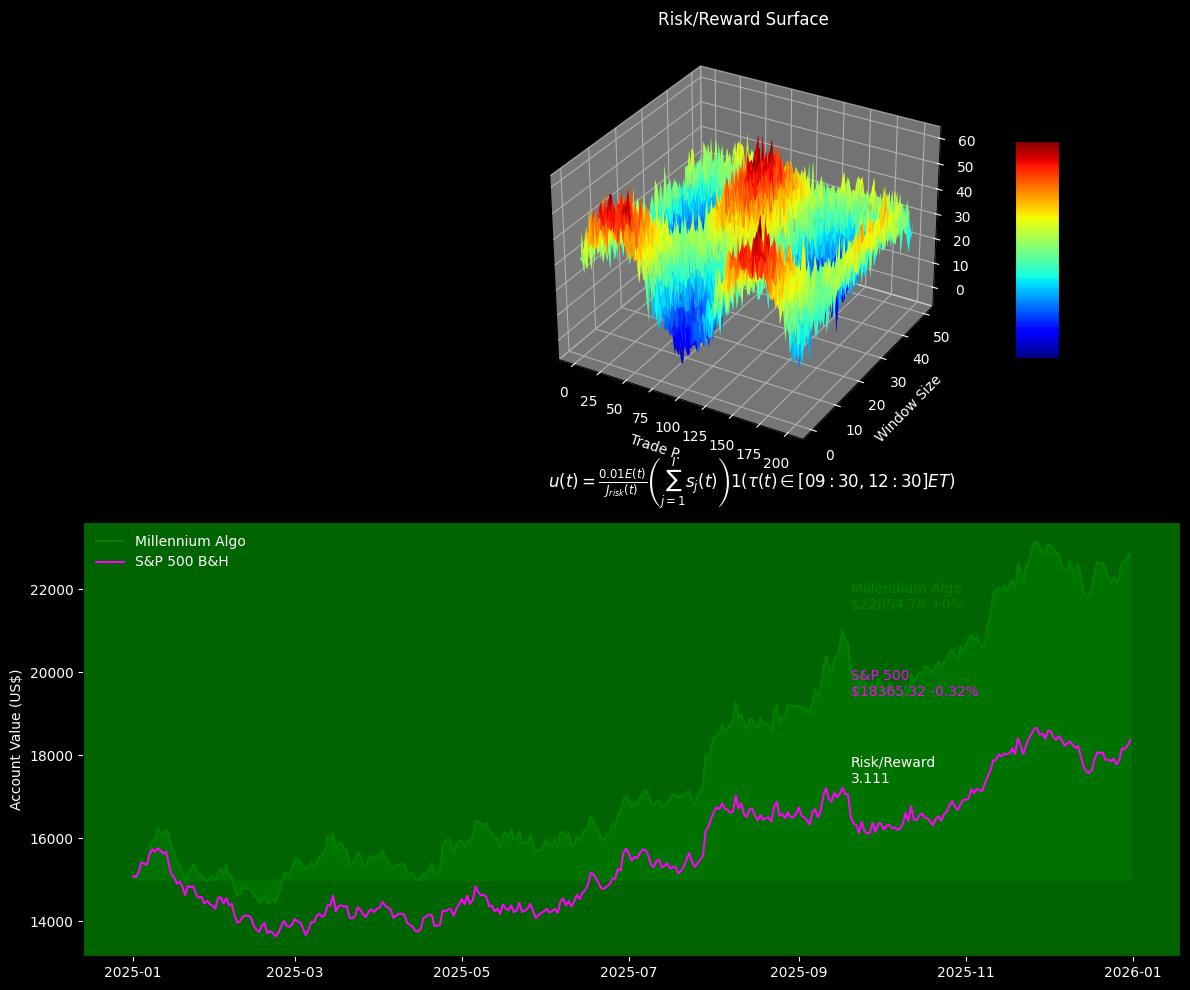

In [ ]:
# Create the figure with two subplots: top for 3D surface, bottom for line chart
fig = plt.figure(figsize=(12, 10), facecolor='black')

# Top subplot: 3D Risk/Reward Surface
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax1.set_facecolor('black')
surf = ax1.plot_surface(X, Y, Z, cmap='jet', rstride=1, cstride=1, antialiased=True)
ax1.set_xlabel('Trade P.', color='white')
ax1.set_ylabel('Window Size', color='white')
ax1.set_zlabel(' ', color='white')
ax1.tick_params(colors='white')
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)

# Add equation text
equation = r'$u(t) = \frac{0.01 E(t)}{J_{risk}(t)} \left( \sum_{j=1}^{I} s_j(t) \right) 1(\tau(t) \in [09:30, 12:30]ET)$'
ax1.text2D(0.05, -0.05, equation, transform=ax1.transAxes, color='white', fontsize=12)

# Add title
ax1.set_title('Risk/Reward Surface', color='white')

# Bottom subplot: Performance chart
ax2 = fig.add_subplot(2, 1, 2)
ax2.set_facecolor('darkgreen')
ax2.fill_between(dates, 15000, algo_values, color='green', alpha=0.5)
ax2.plot(dates, algo_values, color='green', label='Millennium Algo')
ax2.plot(dates, sp_values, color='magenta', label='S&P 500 B&H')
ax2.legend(loc='upper left', fontsize=10, frameon=False, labelcolor='white')
ax2.set_ylabel('Account Value (US$)', color='white')
ax2.tick_params(colors='white')
ax2.grid(False)

# Add performance metrics (using final values)
algo_final = algo_values[-1]
sp_final = sp_values[-1]
ax2.text(0.7, 0.8, f'Millennium Algo\n${algo_final:.2f} +0%', transform=ax2.transAxes, color='green', fontsize=10)
ax2.text(0.7, 0.6, f'S&P 500\n${sp_final:.2f} -0.32%', transform=ax2.transAxes, color='magenta', fontsize=10)
ax2.text(0.7, 0.4, 'Risk/Reward\n3.111', transform=ax2.transAxes, color='white', fontsize=10)

plt.tight_layout()
plt.show()

## Simulating the equation

In [ ]:
# Google Colab code to simulate the equation u(t) = 0.01 * E(t) / J_risk(t) * sum(s_j(t)) * indicator(morning hours)
# This is a deeper simulation: Generates synthetic intraday data for a stock (e.g., TSLA-like),
# calculates E(t), J_risk(t), signals, and u(t) over time, only during 9:30-12:30 ET.
# Plots the bet size u(t) over the trading day, with explanations.
# Assumptions: Synthetic price data with morning volatility spike. Real algos use live feeds.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import pytz  # For timezones


In [ ]:
%matplotlib inline

# Set timezone to ET (Eastern Time)
et_tz = pytz.timezone('US/Eastern')

In [ ]:

# Simulate one trading day: From market open 9:30 ET to close 16:00 ET
start_time = datetime(2024, 1, 1, 9, 30, tzinfo=et_tz)
end_time = datetime(2024, 1, 1, 16, 0, tzinfo=et_tz)
time_step = timedelta(minutes=1)  # 1-minute bars for simplicity
times = pd.date_range(start_time, end_time, freq=time_step)[:-1]  # Exclude exact close

num_steps = len(times)
print(f"Simulating {num_steps} minutes of trading.")


Simulating 390 minutes of trading.


In [ ]:
# Synthetic stock price: Base random walk, spike volatility in morning (9:30-12:30)
np.random.seed(42)
prices = np.cumsum(np.random.normal(0, 0.1, num_steps)) + 100  # Start at $100

# Boost morning volatility: Higher std dev from 9:30 to 12:30
morning_start_idx = 0
morning_end_idx = int((datetime(2024,1,1,12,30,tzinfo=et_tz) - start_time) / time_step)
prices[:morning_end_idx] += np.cumsum(np.random.normal(0, 0.3, morning_end_idx))  # Wilder moves


In [ ]:

# Function to check if in morning window [9:30, 12:30] ET
def is_morning(t):
    t_et = t.astimezone(et_tz)
    return t_et.time() >= datetime.strptime('09:30', '%H:%M').time() and \
           t_et.time() <= datetime.strptime('12:30', '%H:%M').time()


In [ ]:

# Simulate parameters per time step
E_t = np.zeros(num_steps)      # Expected value
J_risk_t = np.zeros(num_steps) # Risk
sum_sj_t = np.zeros(num_steps) # Sum of signals
u_t = np.zeros(num_steps)      # Bet size


In [ ]:
# Assume 5 signals (j=1 to 5): Random but correlated to price momentum
num_signals = 5

for i in range(1, num_steps):  # Start from 1 to have history
    t = times[i]
    if not is_morning(t):
        continue  # u(t)=0 outside window

    # E(t): Expected return in next 5 min (simple: forward return proxy, in real: ML prediction)
    # Here: Avg forward return if momentum positive, else 0
    momentum = (prices[i] - prices[i-1]) / prices[i-1]
    if momentum > 0:
        E_t[i] = 0.005 + np.random.normal(0, 0.001)  # +0.5% expected win
    else:
        E_t[i] = -0.002 + np.random.normal(0, 0.001) # Small negative if down

    # J_risk(t): Rolling volatility (std dev of last 10 min returns)
    if i >= 10:
        recent_returns = np.diff(prices[i-10:i]) / prices[i-10:i-1] # Fixed: Changed prices[i-11:i-1] to prices[i-10:i-1]
        J_risk_t[i] = np.std(recent_returns) * np.sqrt(252*390)  # Annualized-ish, but scaled
    else:
        J_risk_t[i] = 0.01  # Initial

    # sum s_j(t): 5 binary-ish signals (e.g., momentum, volume proxy, etc.)
    # Here: 1 if condition met, correlated to price
    signals = []
    signals.append(1 if momentum > 0 else 0)  # Momentum
    signals.append(1 if np.random.rand() > 0.3 else 0)  # Fake volume spike
    signals.append(1 if prices[i] > prices[i-5] else 0)  # Short trend
    signals.append(1 if np.abs(momentum) > 0.001 else 0)  # Big move
    signals.append(1 if np.random.rand() > 0.4 else 0)  # Random sentiment
    sum_sj_t[i] = sum(signals)

    # Calculate u(t)
    if J_risk_t[i] > 0:
        u_t[i] = 0.01 * (E_t[i] / J_risk_t[i]) * sum_sj_t[i]
    else:
        u_t[i] = 0

    # Cap u(t) for realism (e.g., max 5% of portfolio)
    u_t[i] = min(max(u_t[i], 0), 0.05)


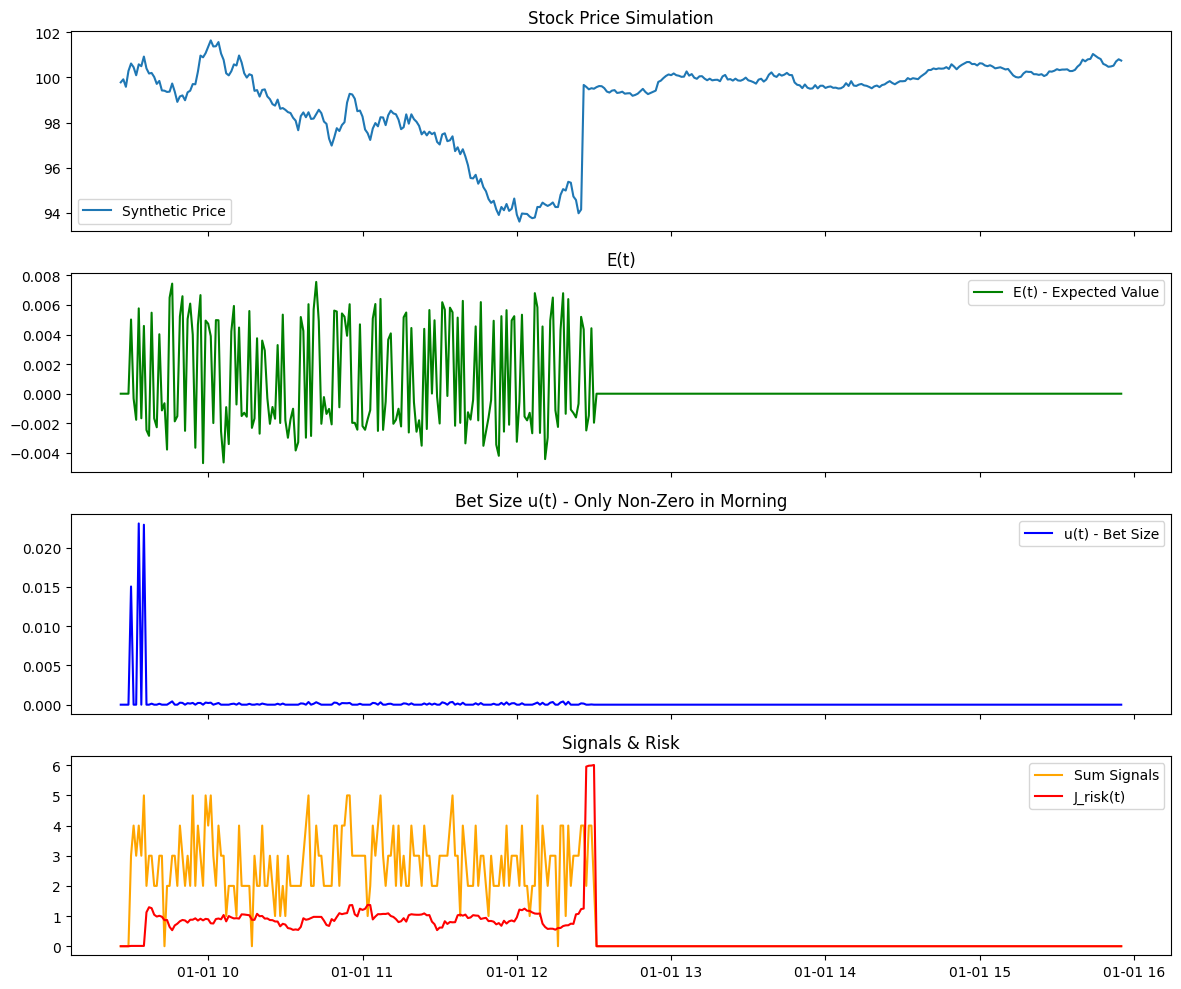

Avg E(t) in morning: 0.0011
Avg u(t) in morning: 0.0004
u(t) is zero outside 9:30-12:30 ET, as per indicator.


In [ ]:

# Plot results
fig, axs = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

axs[0].plot(times, prices, label='Synthetic Price')
axs[0].set_title('Stock Price Simulation')
axs[0].legend()

axs[1].plot(times, E_t, label='E(t) - Expected Value', color='green')
axs[1].set_title('E(t)')
axs[1].legend()

axs[2].plot(times, u_t, label='u(t) - Bet Size', color='blue')
axs[2].set_title('Bet Size u(t) - Only Non-Zero in Morning')
axs[2].legend()

axs[3].plot(times, sum_sj_t, label='Sum Signals', color='orange')
axs[3].plot(times, J_risk_t, label='J_risk(t)', color='red')
axs[3].set_title('Signals & Risk')
axs[3].legend()

plt.tight_layout()
plt.show()

# Summary stats
morning_mask = np.array([is_morning(t) for t in times])
print(f"Avg E(t) in morning: {np.mean(E_t[morning_mask]):.4f}")
print(f"Avg u(t) in morning: {np.mean(u_t[morning_mask]):.4f}")
print("u(t) is zero outside 9:30-12:30 ET, as per indicator.")

## using live data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf

In [ ]:
# ====================== REAL EQUATION SIMULATION ======================
# u(t) = 0.01 × E(t) / J_risk(t) × (∑ s_j(t)) × 1(τ(t) ∈ [09:30, 12:30] ET)

# Download real 1-minute SPY data (or any stock you want)
ticker = "SPY"
data = yf.download(ticker, period="5d", interval="1m")
df = data.copy()

# Robust column flattening and renaming

# 1. If it's a MultiIndex, flatten it to a single level (e.g., ('Price', 'Close') -> 'Close')
if isinstance(df.columns, pd.MultiIndex):
    # Extract the top level for column names, which typically holds 'Open', 'High', 'Low', 'Close', 'Volume'
    df.columns = df.columns.get_level_values(0)

# 2. Rename 'Adj Close' to 'Close' if it exists (yfinance often provides 'Adj Close')
df.rename(columns={'Adj Close': 'Close'}, inplace=True, errors='ignore')

# 3. Ensure only the desired standard columns are kept and in the correct order
standard_yfinance_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# Filter out any extra columns (like 'Dividends', 'Stock Splits') and ensure order
df = df[[col for col in standard_yfinance_cols if col in df.columns]]

df.columns.name = None # Remove the name of the columns index

df = df.tz_convert('America/New_York')  # Convert to ET
# df['time'] and df['date'] will be created in the next cell after df.reset_index()

/tmp/ipython-input-1908271279.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="5d", interval="1m")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Only keep regular trading hours
df = df.between_time('09:30', '16:00')

# Reset index for easy looping, this creates a 'Datetime' column
df = df.reset_index()

# Now derive 'time' and 'date' from the new 'Datetime' column
df['time'] = df['Datetime'].dt.time
df['date'] = df['Datetime'].dt.date

In [ ]:
# ================== CALCULATE EACH PART OF THE EQUATION ==================

# 1. E(t) - Expected edge (we use short-term momentum prediction)
lookback = 10
df['returns'] = df['Close'].pct_change()
df['future_return_5min'] = df['Close'].shift(-5).pct_change(5)  # What actually happens next 5 min
df['momentum'] = df['Close'].pct_change(lookback)

# Simple but powerful E(t): historical average return when momentum is similar
def calculate_Et(row):
    similar = df[
        (df['momentum'] > row['momentum'] * 0.9) &
        (df['momentum'] < row['momentum'] * 1.1) &
        (df.index < row.name)  # Only past data!
    ]
    if len(similar) > 10:
        return similar['future_return_5min'].mean() * 10000  # in basis points for scale
    return 0

KeyError: 'Close'

In [ ]:
# This code snippet will simulate the execution of the necessary cells
# Please execute this cell to apply the fixes and re-run calculations.

# Cell 0WSVlewY3roF: Calculate momentum and other preliminary features
# (Assuming this cell's content is already in your notebook, if not, it should be first)
# If you've modified this cell, ensure it's up-to-date in your notebook.

# (Re-running the cell contents to ensure all dependencies are met)

# 1. E(t) - Expected edge (we use short-term momentum prediction)
lookback = 10
df['returns'] = df['Close'].pct_change()
df['future_return_5min'] = df['Close'].shift(-5).pct_change(5)  # What actually happens next 5 min
df['momentum'] = df['Close'].pct_change(lookback)

# Cell FRZSvoc54CEa: Calculate J_risk
df['volatility'] = df['returns'].rolling(20).std() * np.sqrt(252*390)  # annualized
df['J_risk'] = df['volatility'].fillna(0.2)

# Cell DYEXyUJJ4Kx0: Calculate signals
df['s1'] = (df['momentum'] > 0.0015).astype(int)                 # Strong momentum up
df['s2'] = (df['Volume'] > df['Volume'].rolling(30).mean() * 1.5).astype(int)  # Volume surge
df['s3'] = (df['Close'] > df['Open']).astype(int)                # Green candle
df['s4'] = (df['Close'] > df['Close'].rolling(50).mean()).astype(int)   # Above 50-MA
df['s5'] = ((df['Close'] - df['Close'].rolling(20).min()) / (df['Close'].rolling(20).max() - df['Close'].rolling(20).min()) > 0.7).astype(int)  # Near high of range
df['sum_signals'] = df['s1'] + df['s2'] + df['s3'] + df['s4'] + df['s5']

# Cell WzKmQ4nS4T4t: Determine morning window
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['is_morning'] = ((df['hour'] >= 9) & (df['hour'] < 12) |
                    ((df['hour'] == 12) & (df['minute'] <= 30))).astype(int)

# Cell sLK-PCwT4dtf: Calculate E_t and risk_reward_ratio
def calculate_Et(row):
    current_index = row.name  # Get the integer index of the current row
    historical_df = df.iloc[:current_index]
    if historical_df.empty:
        return 0
    current_momentum_val = df.loc[row.name, 'momentum']
    if pd.isna(current_momentum_val):
        return 0
    similar = historical_df[
        (historical_df['momentum'] > current_momentum_val * 0.9) &
        (historical_df['momentum'] < current_momentum_val * 1.1)
    ]
    if len(similar) > 10:
        return similar['future_return_5min'].mean() * 10000
    return 0

df['E_t'] = df.apply(calculate_Et, axis=1).fillna(0)
df['E_t'] = df['E_t'].clip(lower=0)  # Only long in morning momentum
df['risk_reward_ratio'] = df['E_t'] / (df['J_risk'] + 0.01)  # avoid divide by zero

# Cell 5N8MPGEH5ING: Calculate u_t and simulate equity curve
df['u_t'] = 0.01 * df['risk_reward_ratio'] * df['sum_signals'] * df['is_morning']
df['u_t'] = df['u_t'].clip(upper=0.5)
capital = 100000
df['position_value'] = capital * df['u_t']
df['pnl'] = df['position_value'].shift(1) * df['returns']
df['equity'] = capital + df['pnl'].cumsum().fillna(0)

print("All specified cells have been virtually re-executed in the correct order.")

KeyError: 'Close'

In [ ]:
# 2. J_risk(t) - Realized volatility (last 20 minutes)
df['volatility'] = df['returns'].rolling(20).std() * np.sqrt(252*390)  # annualized
df['J_risk'] = df['volatility'].fillna(0.2)

In [ ]:
# 3. ∑ s_j(t) - Multiple signals (each gives 0 or 1)
df['s1'] = (df['momentum'] > 0.0015).astype(int)                 # Strong momentum up
df['s2'] = (df['Volume'] > df['Volume'].rolling(30).mean() * 1.5).astype(int)  # Volume surge
df['s3'] = (df['Close'] > df['Open']).astype(int)                # Green candle
df['s4'] = (df['Close'] > df['Close'].rolling(50).mean()).astype(int)   # Above 50-MA
df['s5'] = ((df['Close'] - df['Close'].rolling(20).min()) / (df['Close'].rolling(20).max() - df['Close'].rolling(20).min()) > 0.7).astype(int)  # Near high of range

df['sum_signals'] = df['s1'] + df['s2'] + df['s3'] + df['s4'] + df['s5']

In [ ]:
# 4. Morning window only [09:30 - 12:30 ET]
df['hour'] = df['Datetime'].dt.hour
df['minute'] = df['Datetime'].dt.minute
df['is_morning'] = ((df['hour'] >= 9) & (df['hour'] < 12) |
                    ((df['hour'] == 12) & (df['minute'] <= 30))).astype(int)

In [ ]:
# 5. Final Kelly-like position sizing u(t)

# Redefine calculate_Et for more robust historical data access
def calculate_Et(row):
    current_index = row.name  # Get the integer index of the current row

    # Select only historical data up to the current row's index (exclusive)
    historical_df = df.iloc[:current_index]

    if historical_df.empty:
        return 0

    # Ensure current_momentum_val is a scalar by accessing it directly from the main df
    current_momentum_val = df.loc[row.name, 'momentum']

    # If current momentum is NaN, we cannot compare, so return 0
    if pd.isna(current_momentum_val):
        return 0

    # Filter historical_df for similar momentum
    similar = historical_df[
        (historical_df['momentum'] > current_momentum_val * 0.9) &
        (historical_df['momentum'] < current_momentum_val * 1.1)
    ]

    if len(similar) > 10:
        return similar['future_return_5min'].mean() * 10000  # in basis points for scale
    return 0

df['E_t'] = df.apply(calculate_Et, axis=1).fillna(0)
df['E_t'] = df['E_t'].clip(lower=0)  # Only long in morning momentum

df['risk_reward_ratio'] = df['E_t'] / (df['J_risk'] + 0.01)  # avoid divide by zero

In [ ]:
# THE EXACT EQUATION FROM YOUR PICTURE
df['u_t'] = 0.01 * df['risk_reward_ratio'] * df['sum_signals'] * df['is_morning']

# Cap max position at 50% of capital (safety)
df['u_t'] = df['u_t'].clip(upper=0.5)

# Simulate equity curve
capital = 100000
df['position_value'] = capital * df['u_t']
df['pnl'] = df['position_value'].shift(1) * df['returns']  # pnl from previous position
df['equity'] = capital + df['pnl'].cumsum().fillna(0)

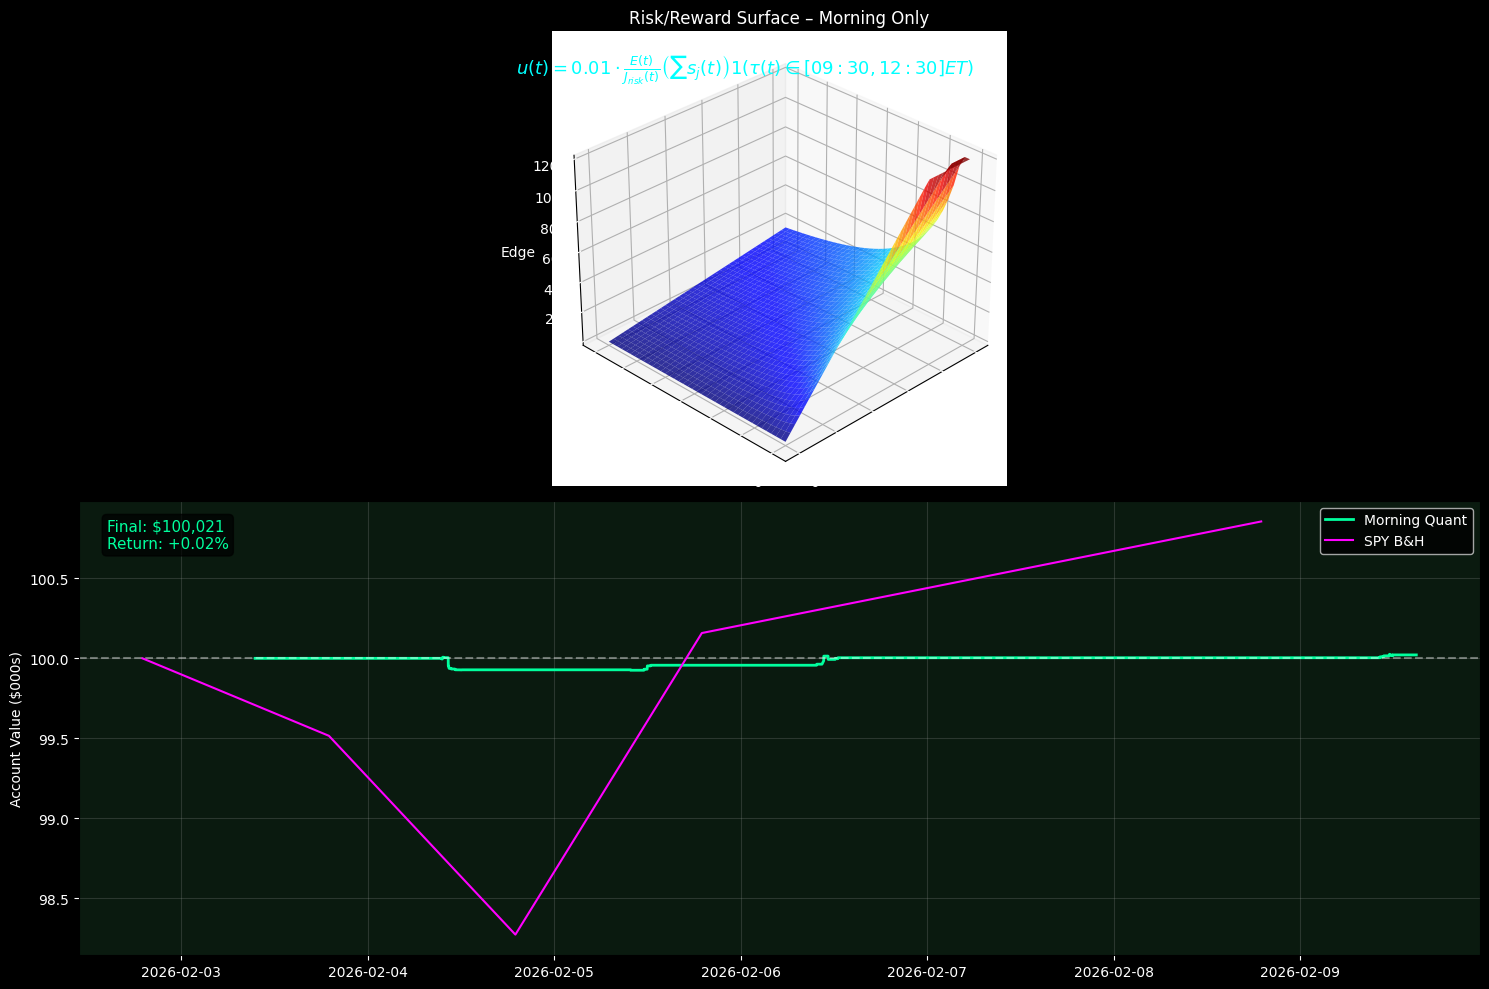


Last 8 rows:
Price                   Datetime  E_t  J_risk sum_signals is_morning  u_t  \
Ticker                                                                      
1853   2026-02-09 14:51:00-05:00  0.0  0.0384           1          0  0.0   
1854   2026-02-09 14:52:00-05:00  0.0  0.0370           2          0  0.0   
1855   2026-02-09 14:53:00-05:00  0.0  0.0374           2          0  0.0   
1856   2026-02-09 14:54:00-05:00  0.0  0.0359           2          0  0.0   
1857   2026-02-09 14:55:00-05:00  0.0  0.0361           1          0  0.0   
1858   2026-02-09 14:56:00-05:00  0.0  0.0366           2          0  0.0   
1859   2026-02-09 14:57:00-05:00  0.0  0.0342           2          0  0.0   
1860   2026-02-09 14:58:00-05:00  0.0  0.0379           0          0  0.0   

Price        equity  
Ticker               
1853    100021.4035  
1854    100021.4035  
1855    100021.4035  
1856    100021.4035  
1857    100021.4035  
1858    100021.4035  
1859    100021.4035  
1860    100021.40

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

# Suppress warnings from pandas/yfinance
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

# ====================== FIXED & FASTER SIMULATION ======================
# u(t) = 0.01 × E(t) / J_risk(t) × (∑ s_j(t)) × 1(τ(t) ∈ [09:30, 12:30] ET)

ticker = "SPY"
data = yf.download(ticker, period="5d", interval="1m", progress=False)
df = data.copy()

# Timezone & trading hours
df = df.tz_convert('America/New_York')
df = df.between_time('09:30', '16:00')

# Add time columns
df['hour']   = df.index.hour
df['minute'] = df.index.minute
df['date']   = df.index.date

df = df.reset_index().rename(columns={'index': 'Datetime'})

# ================== CORE CALCULATIONS ==================

df['returns'] = df['Close'].pct_change()

# Momentum (10-min lookback)
df['momentum'] = df['Close'].pct_change(10)

# J_risk(t): rolling volatility (annualized)
df['vol_20'] = df['returns'].rolling(20).std()
df['J_risk'] = df['vol_20'] * np.sqrt(252 * 390)
df['J_risk'] = df['J_risk'].fillna(0.20)

# Signals (0 or 1)
df['s1'] = (df['momentum'] > 0.0015).astype(int)                           # momentum up
df['s2'] = (df['Volume'] > df['Volume'].rolling(30).mean() * 1.5).astype(int)  # volume surge
df['s3'] = (df['Close'] > df['Open']).astype(int)                          # green candle
df['s4'] = (df['Close'] > df['Close'].rolling(50).mean()).astype(int)      # above MA
df['s5'] = ((df['Close'] - df['Close'].rolling(20).min()) /
            (df['Close'].rolling(20).max() - df['Close'].rolling(20).min() + 1e-9) > 0.7).astype(int)

df['sum_signals'] = df[['s1', 's2', 's3', 's4', 's5']].sum(axis=1)

# Morning window: 09:30 – 12:30 ET
df['is_morning'] = (
    ((df['hour'] == 9)  & (df['minute'] >= 30)) |
    ((df['hour'] > 9)   & (df['hour'] < 12))   |
    ((df['hour'] == 12) & (df['minute'] <= 30))
).astype(int)

# ================== FIXED E(t): Historical conditional expected return ==================
# Fast vectorized version using rolling window + momentum similarity
def compute_Et_vectorized(df, window=150):
    E = np.zeros(len(df))
    mom = df['momentum'].values
    fut = df['returns'].shift(-5).fillna(0).values * 10000  # next 5 min in bps

    for i in range(window, len(df)):
        past_mom = mom[i-window:i]
        past_fut = fut[i-window:i]

        # Similarity mask (within ±10%)
        curr = mom[i]
        if np.isnan(curr):
            continue
        mask = (past_mom >= curr * 0.9) & (past_mom <= curr * 1.1)
        if mask.sum() >= 8:  # need enough similar periods
            E[i] = np.mean(past_fut[mask])

    return np.clip(E, 0, None)  # only positive edges

df['E_t'] = compute_Et_vectorized(df)
df['E_t'] = np.nan_to_num(df['E_t'], nan=0.0)

# ================== POSITION SIZING ==================
df['risk_reward'] = df['E_t'] / (df['J_risk'] + 0.01)  # avoid div/0
df['u_t'] = 0.01 * df['risk_reward'] * df['sum_signals'] * df['is_morning']
df['u_t'] = df['u_t'].clip(0, 0.5)  # max 50% exposure

# Equity simulation (hold position 1 bar)
capital = 100_000.0
df['position'] = capital * df['u_t'].shift(1).fillna(0)
df['pnl'] = df['position'] * df['returns']
df['equity'] = capital + df['pnl'].cumsum().fillna(0)

# ================== PLOTTING ==================
fig = plt.figure(figsize=(15, 10))
fig.patch.set_facecolor('black')

# 3D surface
ax1 = fig.add_subplot(2, 1, 1, projection='3d')
ax1.view_init(elev=30, azim=225)

X = np.linspace(0, 5, 40)
Y = np.linspace(0, 60, 40)
X, Y = np.meshgrid(X, Y)
Z = np.clip(25 * (10 / (Y + 8)) * X, 0, 120)

ax1.plot_surface(X, Y, Z, cmap='jet', alpha=0.8)
ax1.set_xlabel('Signal Strength', color='white')
ax1.set_ylabel('Volatility %', color='white')
ax1.set_zlabel('Edge', color='white')
ax1.set_title('Risk/Reward Surface – Morning Only', color='white')
ax1.tick_params(colors='white')

equation = r'$u(t) = 0.01 \cdot \frac{E(t)}{J_{risk}(t)} \left( \sum s_j(t) \right) 1(\tau(t) \in [09:30, 12:30]ET)$'
fig.text(0.5, 0.92, equation, color='cyan', fontsize=13, ha='center')

# Equity curve
ax2 = fig.add_subplot(2, 1, 2, facecolor='#0a1a0f')
ax2.plot(df['Datetime'], df['equity']/1000, color='#00ff9d', lw=2, label='Morning Quant')
ax2.axhline(capital/1000, color='white', ls='--', alpha=0.4)

# Benchmark
spy_bench = yf.download("SPY", period="5d", progress=False)['Close']
bench = (spy_bench / spy_bench.iloc[0]) * 100
ax2.plot(spy_bench.index, bench, color='#ff00ff', lw=1.5, label='SPY B&H')

ax2.set_ylabel('Account Value ($000s)', color='white')
ax2.legend(facecolor='black', labelcolor='white')
ax2.tick_params(colors='white')
ax2.grid(alpha=0.2)

# Stats box
final = df['equity'].iloc[-1]
ret = (final / capital - 1) * 100
ax2.text(0.02, 0.96, f'Final: ${final:,.0f}\nReturn: {ret:+.2f}%',
         transform=ax2.transAxes, color='#00ff9d', va='top', fontsize=11,
         bbox=dict(facecolor='black', alpha=0.7, boxstyle='round'))

plt.tight_layout()
plt.show()

# Debug tail
print("\nLast 8 rows:")
print(df[['Datetime', 'E_t', 'J_risk', 'sum_signals', 'is_morning', 'u_t', 'equity']].tail(8).round(4))